In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn import datasets, linear_model
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [8]:

# Importing CSV and defining columns
df = pd.read_csv("deliveries.csv")

In [9]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

([], [])

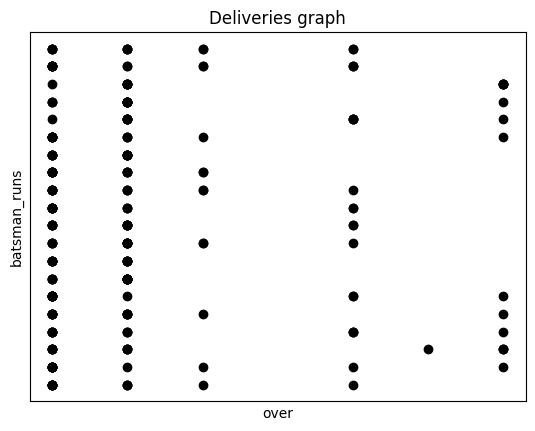

In [14]:
Y = df['over']
X = df['batsman_runs']


X=X.values.reshape(len(X),1)
Y=Y.values.reshape(len(Y),1)

# Segmenting the data into training and test subsets
X_train = X[:-250]
X_test = X[-250:]

Y_train = Y[:-250]
Y_test = Y[-250:]

# Visualizing the output
plt.scatter(X_test, Y_test, color='black')
plt.title('Deliveries graph')
plt.xlabel('over')
plt.ylabel('batsman_runs')
plt.xticks(())
plt.yticks(())


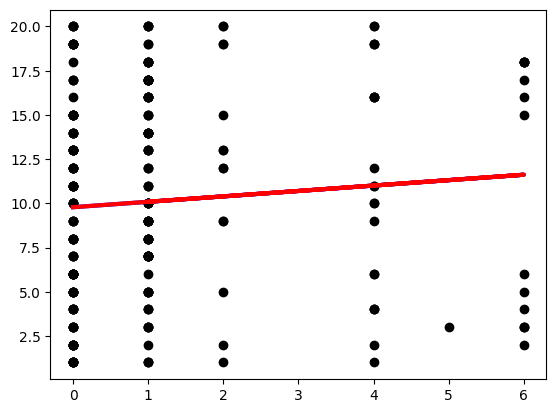

In [15]:
# Initializing the linear regression model
regr = linear_model.LinearRegression()

# Training the model using the training subset
regr.fit(X_train, Y_train)
y_pred=regr.predict(X_test)

plt.scatter(X_test, Y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

# Visualizing the outputs
plt.plot(X_test, y_pred, color='red', linewidth=3)

In [16]:
print("MAE",mean_absolute_error(Y_test,y_pred))

MAE 4.951308370878739


In [17]:

from sklearn.metrics import r2_score
r2 = r2_score(Y_test,y_pred)
print("Coefficient of determination: ",r2)

Coefficient of determination:  0.003010535515558743


In [18]:
print("RMSE",np.log(np.sqrt(mean_squared_error(Y_test,y_pred))))

RMSE 1.7470128381673982


In [26]:
y_pred=y_pred.astype(int)

In [27]:
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(Y_test, y_pred) 
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[0 0 0 0 0 0 0 0 7 4 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 2 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 5 4 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 5 3 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 6 6 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 9 1 3 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 4 9 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 6 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 4 9 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 5 6 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 7 3 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 6 5 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 7 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 5 7 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 7 4 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 6 5 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 8 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 6 5 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 7 4 3 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 4 6 2 0 0 0 0 0 0 0 0 0]]
